<a href="https://colab.research.google.com/github/gerges87/Real-Time-sentimet-Analyzer-And-Reporter/blob/main/Pumpkin_Seeds_Dataset(RandomForest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/pumpkin-seeds-dataset")

print("Path to dataset files:", path)

100%|██████████| 393k/393k [00:00<00:00, 68.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/pumpkin-seeds-dataset/versions/1


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/muratkokludataset/pumpkin-seeds-dataset/versions/1"
print(os.listdir(dataset_path))

['Pumpkin_Seeds_Dataset']


In [ ]:
for file in files:
    print("•", file)

• Pumpkin_Seeds_Dataset


In [ ]:

for file in files:
    full_path = os.path.join(dataset_path, file)
    if os.path.isdir(full_path):
        print(f" {file} --> folder")

In [ ]:

print("  Pumpkin_Seeds_Dataset:")
for file in files:
    print("•", file)

  Pumpkin_Seeds_Dataset:
• Pumpkin_Seeds_Dataset.arff
• Pumpkin_Seeds_Dataset.xlsx
• Pumpkin_Seeds_Dataset_Citation_Request.txt


In [ ]:

inner_path = "/root/.cache/kagglehub/datasets/muratkokludataset/pumpkin-seeds-dataset/versions/1/Pumpkin_Seeds_Dataset"
file_path = os.path.join(inner_path, "Pumpkin_Seeds_Dataset.xlsx")

df = pd.read_excel(file_path)


print(df.head())

    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçev

In [ ]:
print("🔹 Dataset Info:")
print(df.info())
print("\n🔹 Descriptive Statistics:")
print(df.describe())
print("\n🔹 Class Distribution:")
print(df['Class'].value_counts())

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB
None

🔹 Descriptive Statistics:
                Area    Perimeter  Major_Axis_Length  Minor_

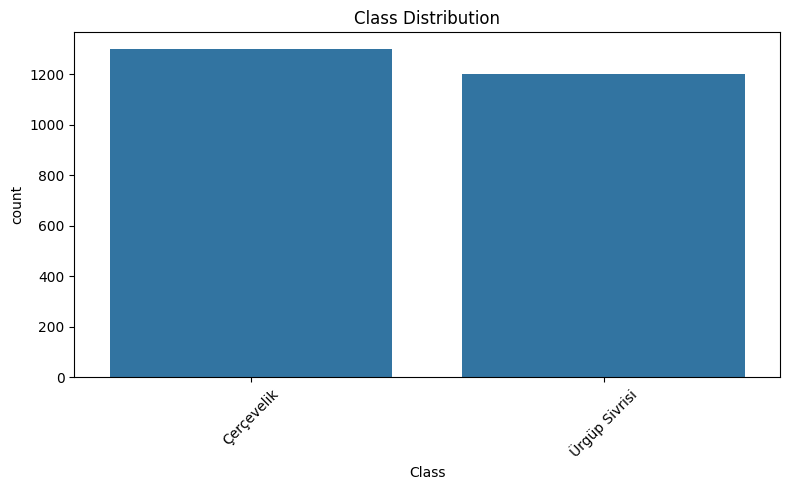

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Class', order=df['Class'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.tight_layout()
plt.show()

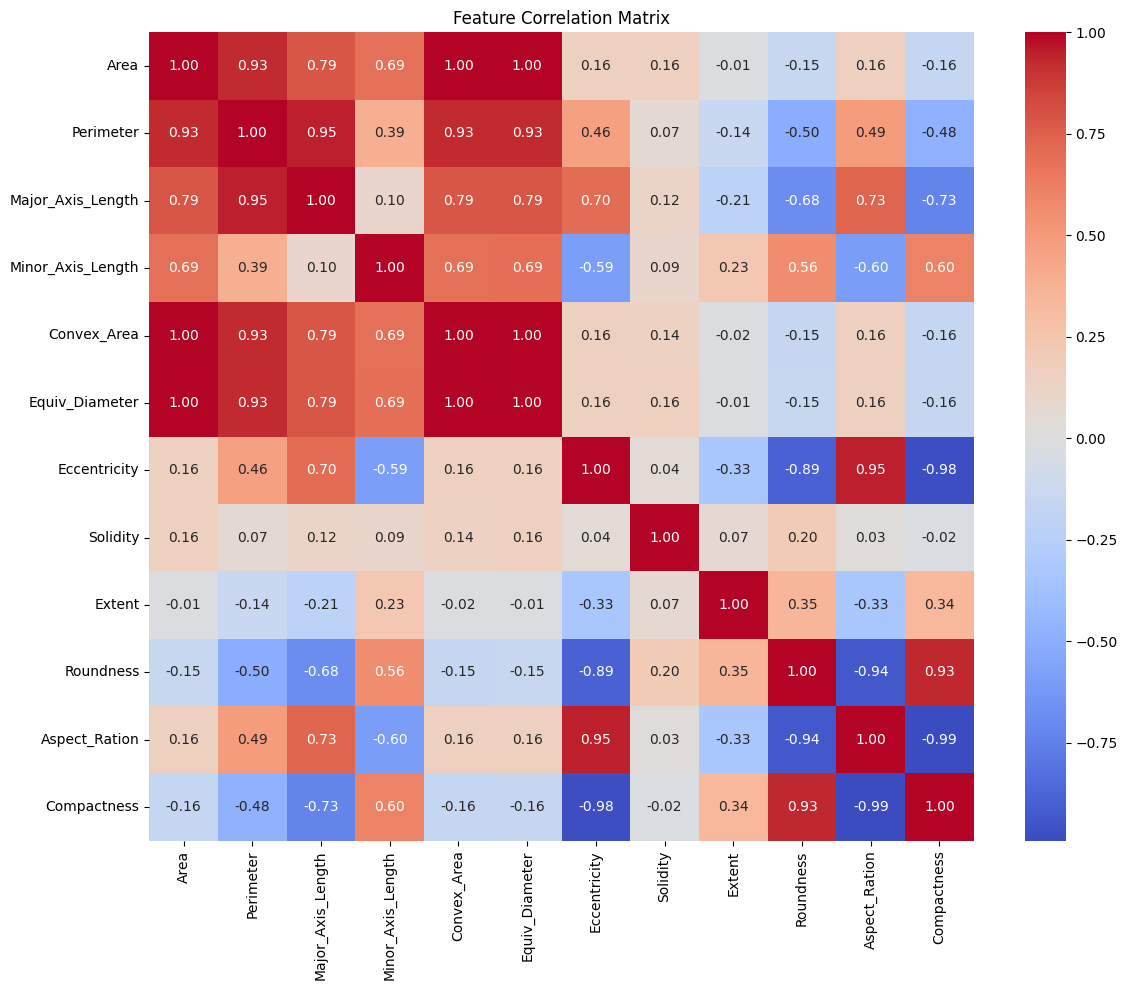

In [ ]:
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


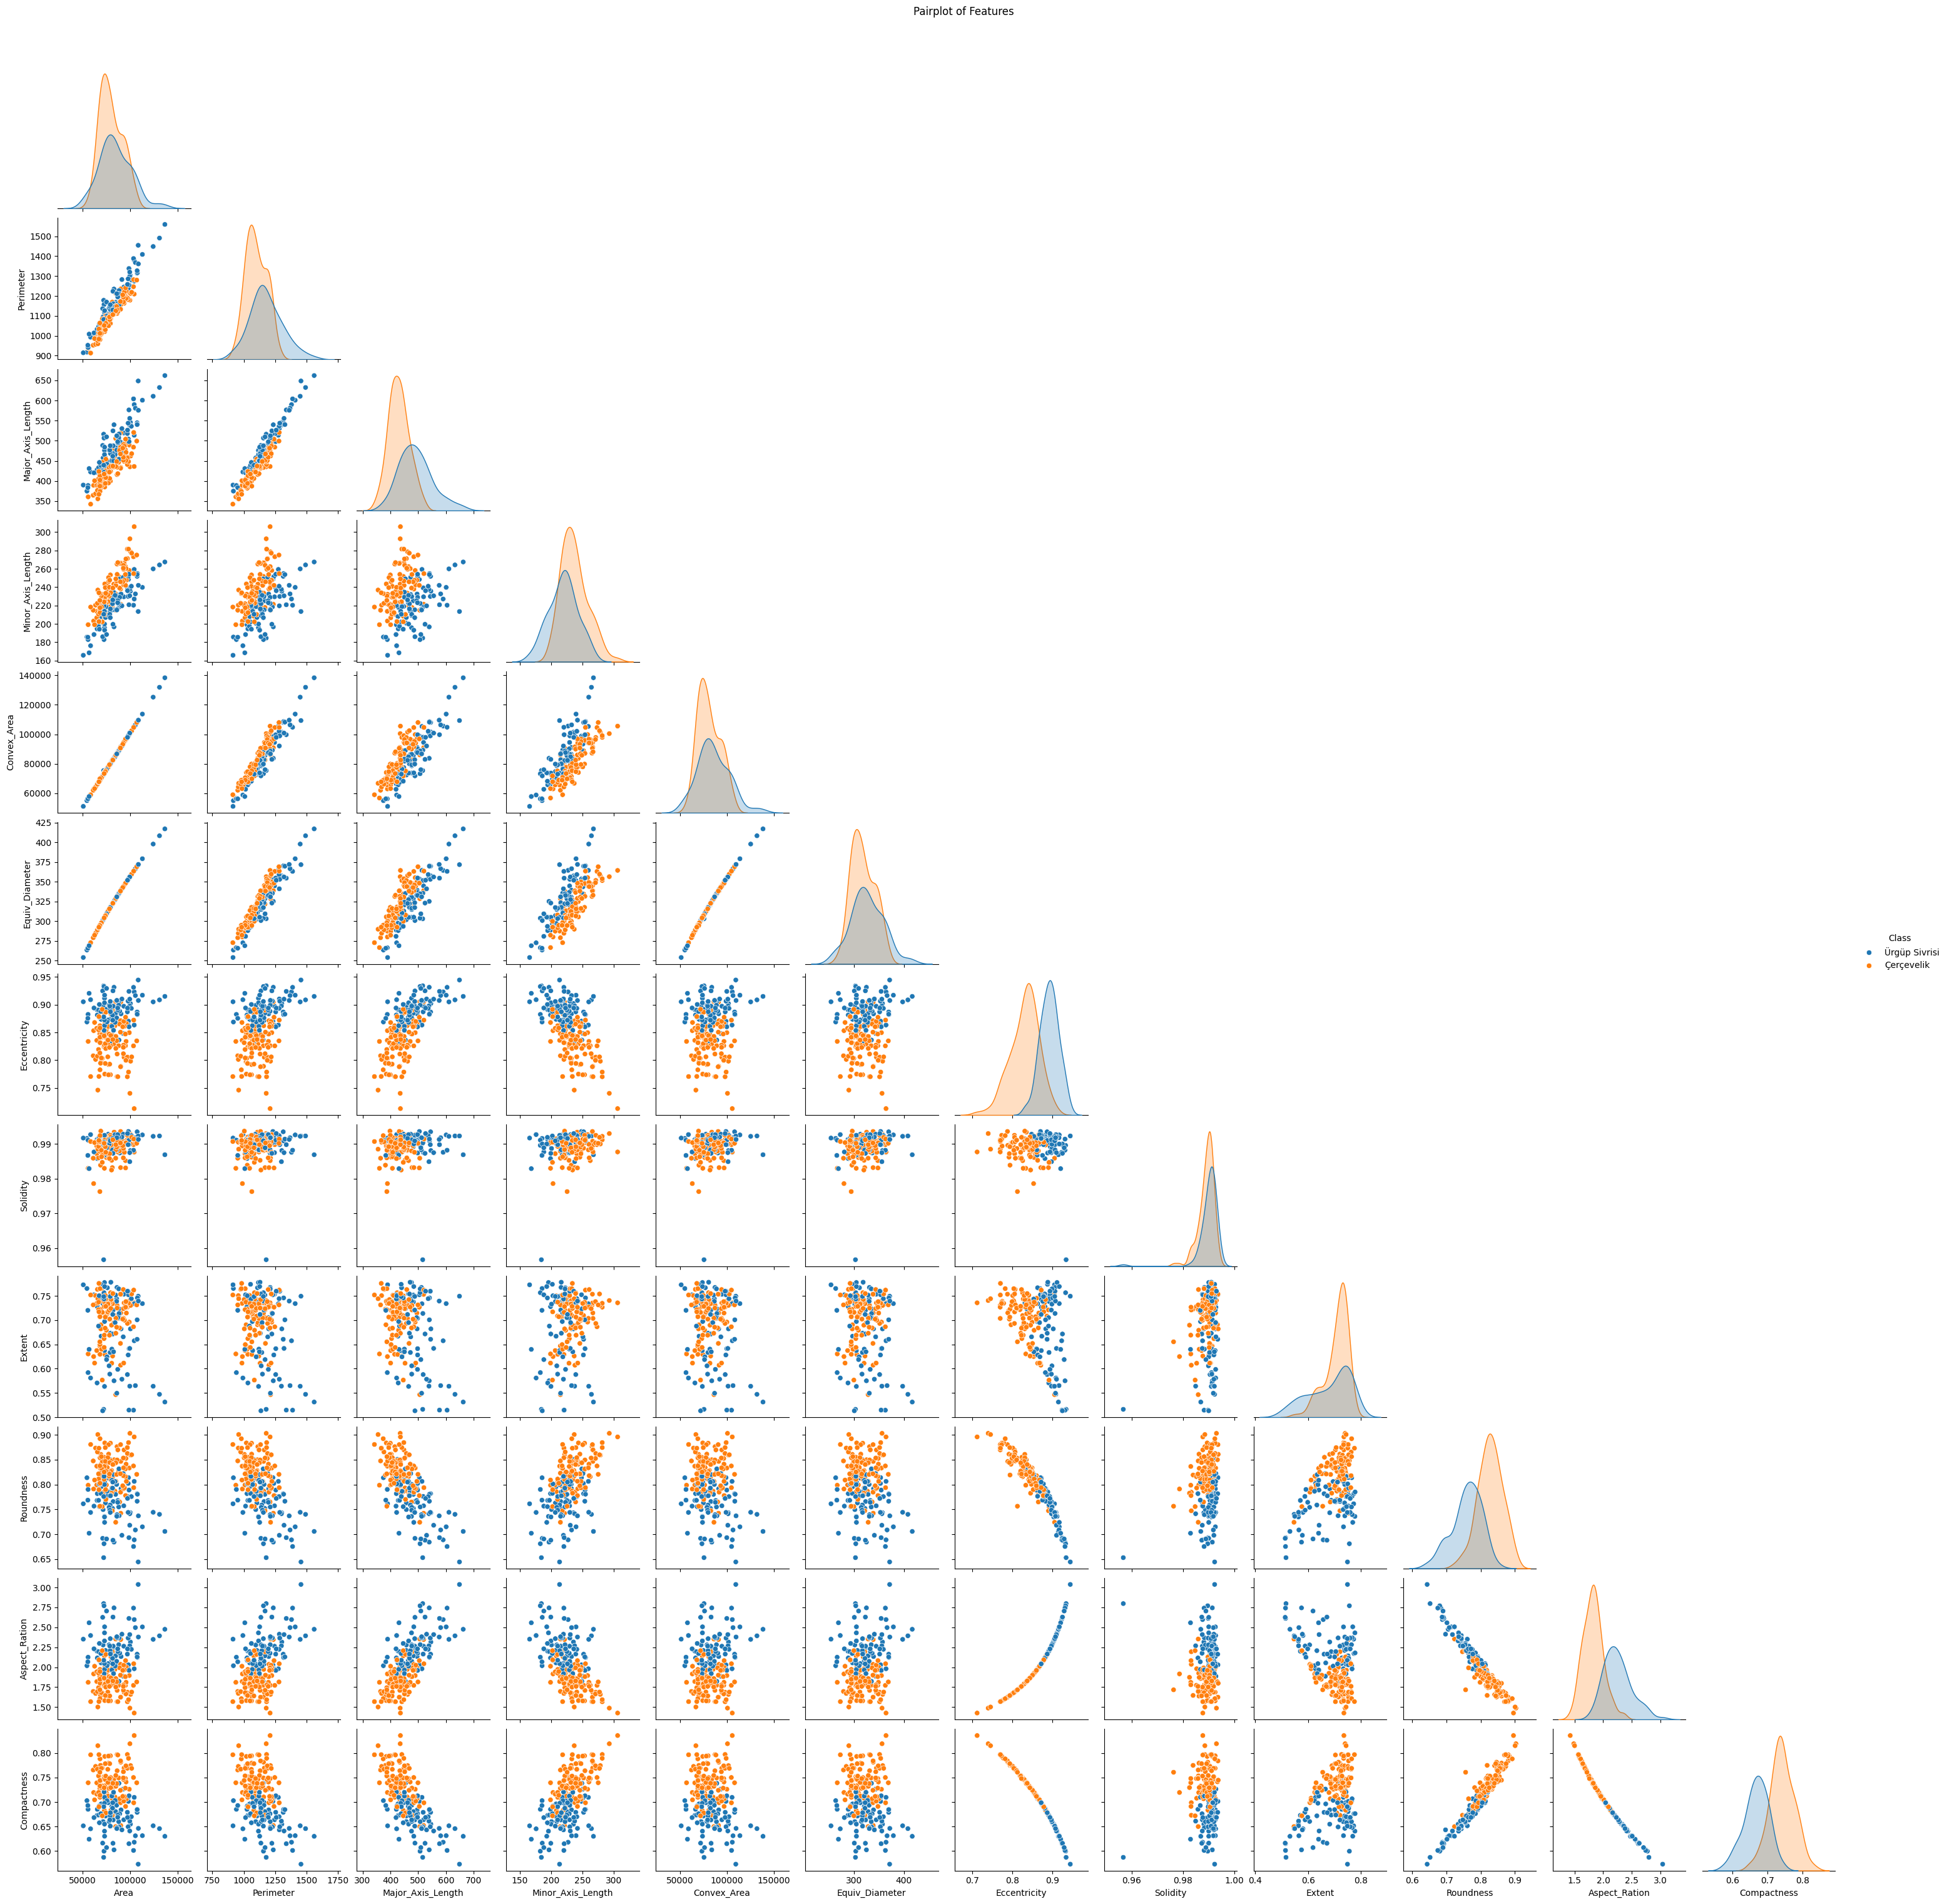

In [ ]:
sns.pairplot(df.sample(200, random_state=42), hue='Class', corner=True)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

               precision    recall  f1-score   support

   Çerçevelik       0.83      0.88      0.85       251
Ürgüp Sivrisi       0.87      0.82      0.84       249

     accuracy                           0.85       500
    macro avg       0.85      0.85      0.85       500
 weighted avg       0.85      0.85      0.85       500



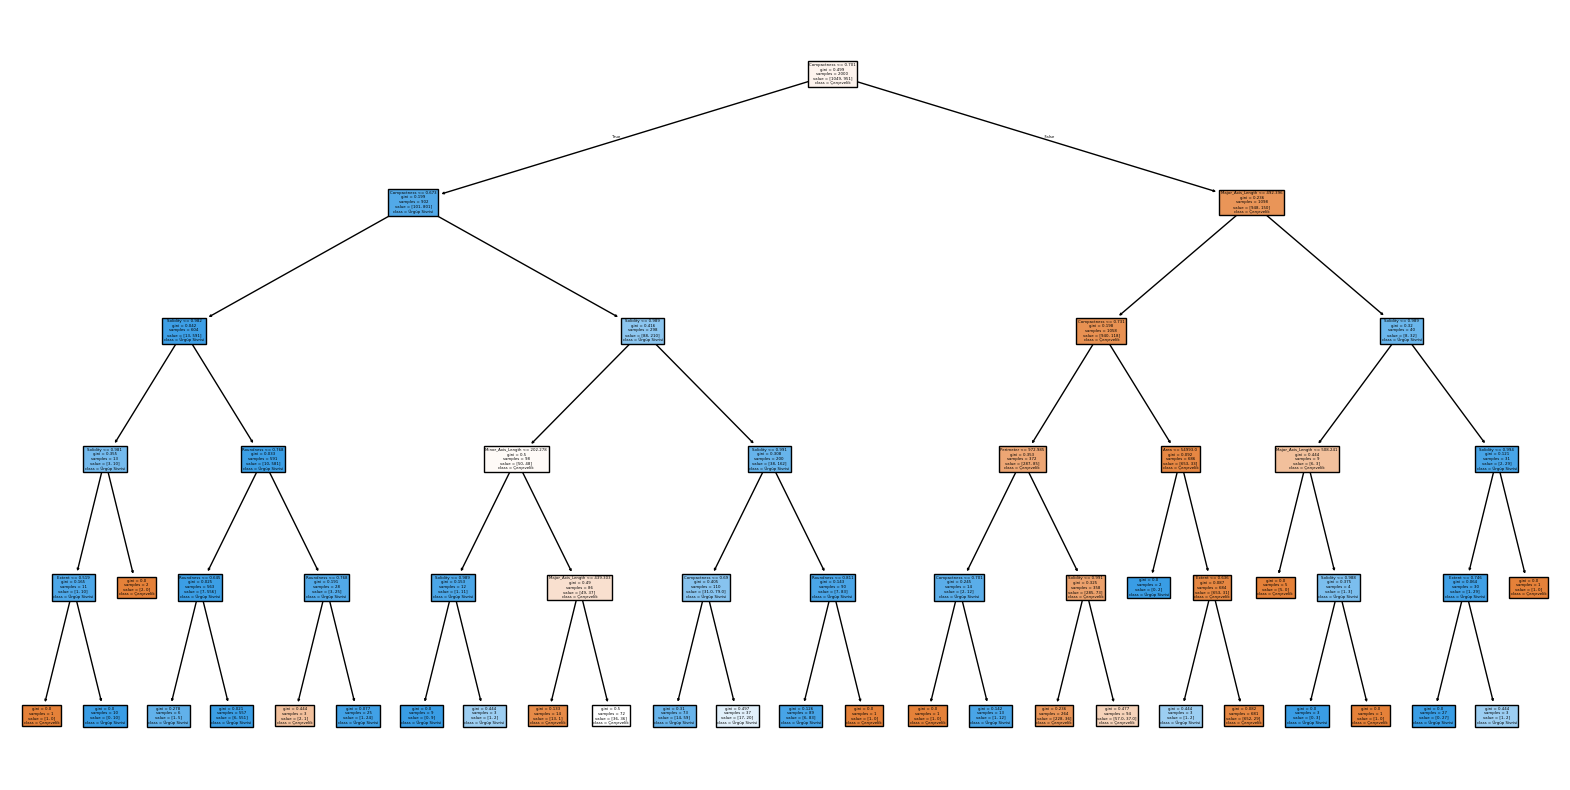

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 1.
X = df.drop("Class", axis=1)
y = df["Class"]

# 2.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4.
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 5.
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 6.
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()

Random Forest Classification Report:
               precision    recall  f1-score   support

   Çerçevelik       0.87      0.87      0.87       251
Ürgüp Sivrisi       0.87      0.86      0.87       249

     accuracy                           0.87       500
    macro avg       0.87      0.87      0.87       500
 weighted avg       0.87      0.87      0.87       500



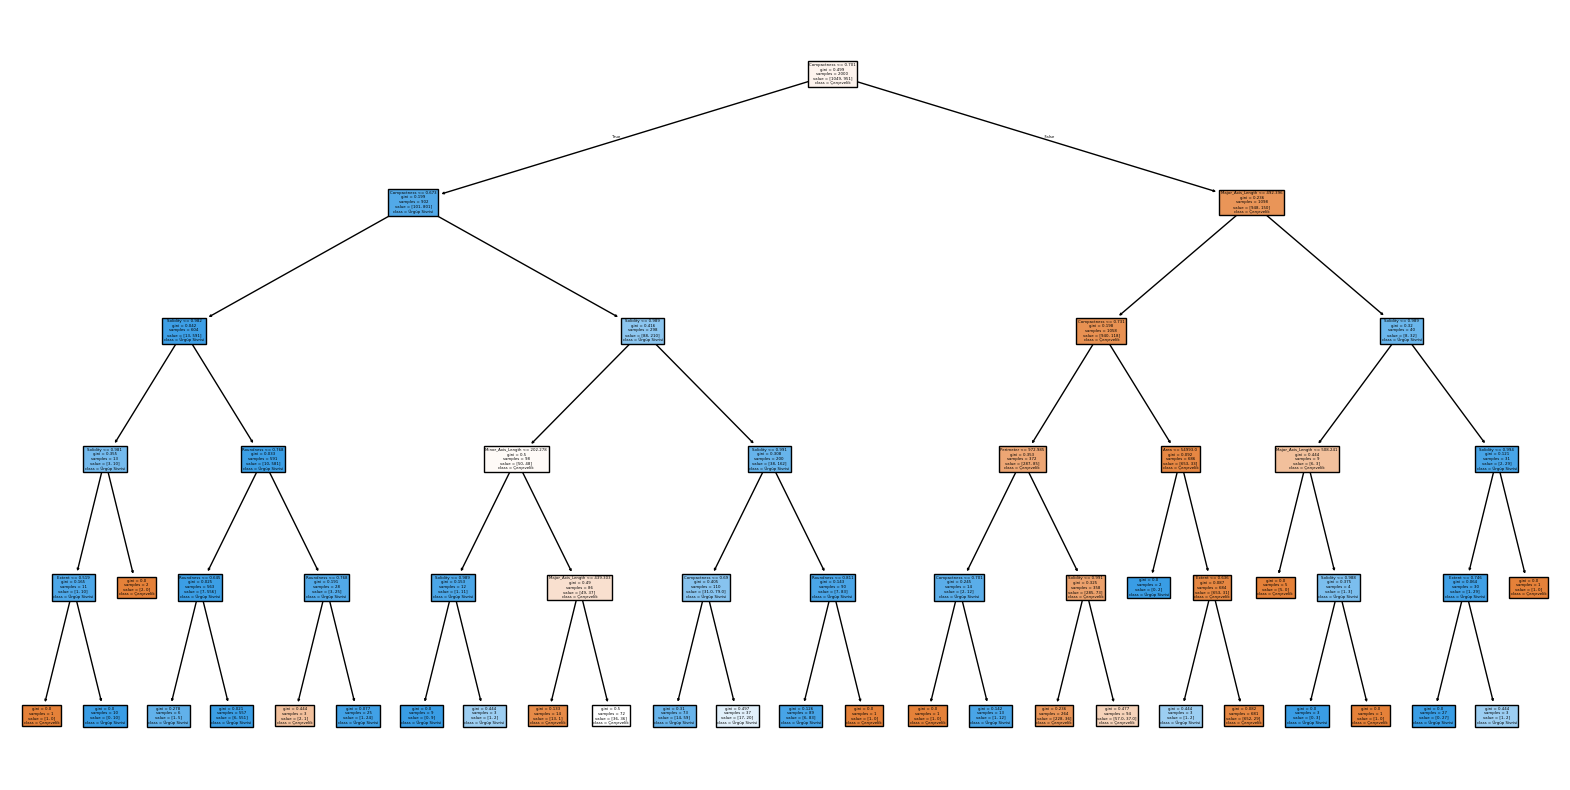

In [ ]:

# Train a Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()